In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wines = pd.read_csv('input/winemag-data-130k-v2.csv')

In [3]:
wines.head(5)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

# Unwanted columns

In [4]:
wines = wines.drop(columns=['Unnamed: 0','region_1','region_2','taster_twitter_handle','designation'])

In [5]:
wines.head(0)

Empty DataFrame
Columns: [country, description, points, price, province, taster_name, title, variety, winery]
Index: []

# Missing Data

Lets see if we have any missing data

In [6]:
wines.isnull().values.any()

True

Let us see where are the missing data

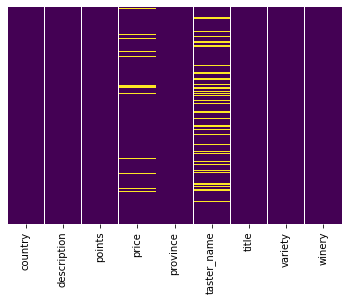

In [7]:
sns.heatmap(wines.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* Replacing the null values in price by the median of the price columns
* Replacing the null taster name values with "No name"

In [8]:
wines.price.fillna(wines.price.dropna().median(),inplace =True)
wines['taster_name'].fillna("No name", inplace =True)

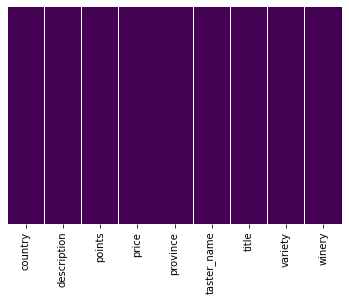

In [9]:
sns.heatmap(wines.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Outliers

Outlier in price

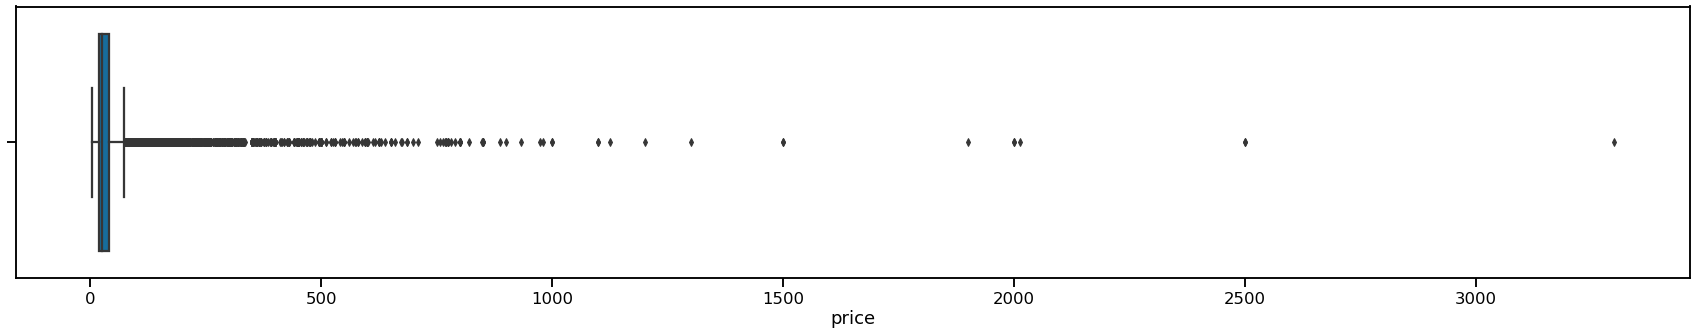

In [10]:
sns.set_context("talk")
plt.figure(figsize=(30,5))
sns.boxplot(x=wines['price'],palette = 'colorblind')

We can see that there are no 'abnormal' values and most of the values are real, and will be useful for future analysis.

Outlier in points

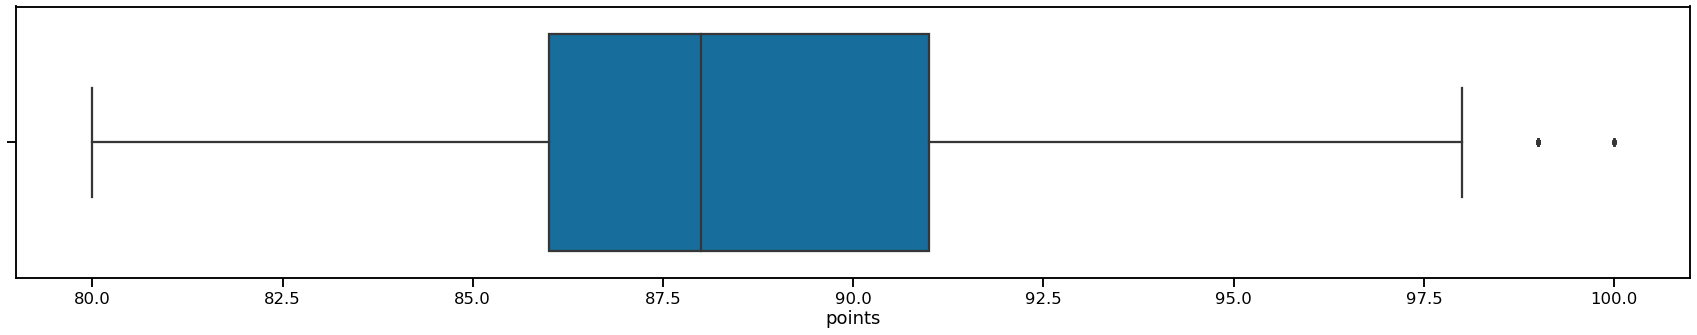

In [11]:
sns.set_context("talk")
plt.figure(figsize=(30,5))
sns.boxplot(x=wines['points'],palette = 'colorblind')

Here also we can see that there is no outliers and the points are between 80 and 100.